In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from entlearn.utils.synthetic_data import make_worm
np.random.seed(42)

Text(0, 0.5, 'Feature 1')

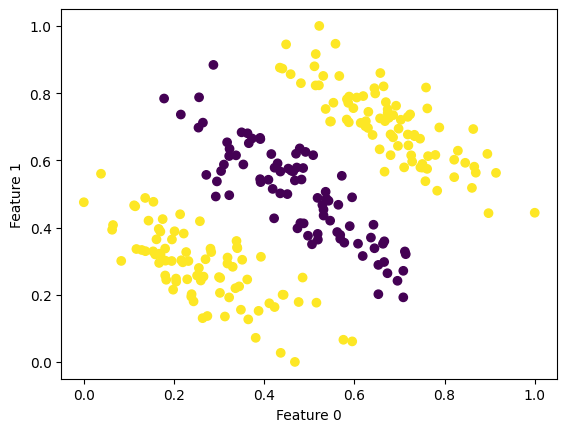

In [ ]:
T = 250
D = 10

X, y = make_worm(D=D, T=T, sigma=5)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [3]:
from entlearn.models.EON_search import Hyperparameters_EON, EONSearch

space = Hyperparameters_EON(
    K = (3,30),
    epsD = (1e-3, 1e-1),
    epsC = (1e-4, 1e-1),
    epsT = (1e-2, 1e1),
    epsG = (1e-9, 1e-6),
)

In [4]:
space


        Hyperparameter ranges:
        	K: 	from 3 to 30
        	epsG: 	from 1e-09 to 1e-06
        	epsC: 	from 0.0001 to 0.1
        	epsD: 	from 0.001 to 0.1
        	epsT: 	from 0.01 to 10.0
        

In [5]:
search = EONSearch(
    n_search_iters=500,
    space = space,
    anneals = 10,
    n_jobs=-1
)

In [6]:
search.fit(X,y)

[I 2025-07-02 08:20:57,007] A new study created in memory with name: 
[I 2025-07-02 08:20:57,424] Trial 1 finished with values: [0.6911764705882353, 7.0] and parameters: {'K': 5, 'epsG': 2.340980493380072e-09, 'epsD': 0.0018117382572213805, 'epsT': 1.4925720628162957, 'epsC': 0.016961084499821776, 'kpp_init': False}.
[I 2025-07-02 08:20:57,844] Trial 9 finished with values: [0.53719723183391, 23.0] and parameters: {'K': 15, 'epsG': 8.279527615858437e-07, 'epsD': 0.023577932143954965, 'epsT': 0.010359319672061884, 'epsC': 0.08606850338142588, 'kpp_init': True}.
[I 2025-07-02 08:20:58,089] Trial 0 finished with values: [0.7794117647058822, 7.0] and parameters: {'K': 16, 'epsG': 7.0124402495527235e-09, 'epsD': 0.0017543744887326194, 'epsT': 1.2983763632742, 'epsC': 0.04615625486414263, 'kpp_init': True}.
[I 2025-07-02 08:20:58,121] Trial 11 finished with values: [0.7794117647058822, 7.0] and parameters: {'K': 4, 'epsG': 3.69565792970967e-07, 'epsD': 0.0019810158626778836, 'epsT': 8.390066

Number of trials on the Pareto front: 185
Trial with highest accuracy: 
	number: 19
	params: {'K': 29, 'epsG': 2.3786448826115608e-09, 'epsD': 0.07465628600047887, 'epsT': 0.4319840624948872, 'epsC': 0.011475927233169902, 'kpp_init': True}
	values: [1.0, 11.0]


EONSearch(anneals=10, n_search_iters=500,
          space=
        Hyperparameter ranges:
        	K: 	from 3 to 30
        	epsG: 	from 1e-09 to 1e-06
        	epsC: 	from 0.0001 to 0.1
        	epsD: 	from 0.001 to 0.1
        	epsT: 	from 0.01 to 10.0
        )

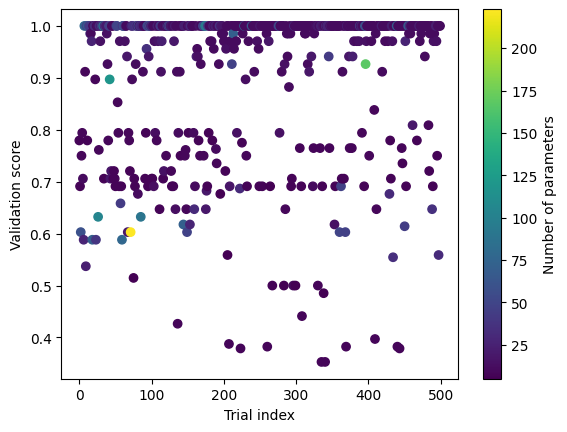

In [7]:
plt.scatter(search.info_all_trials.index, search.info_all_trials['val_score'], c=search.info_all_trials['n_params'])
plt.xlabel("Trial index")
plt.ylabel("Validation score")
plt.colorbar(label='Number of parameters')
plt.show()

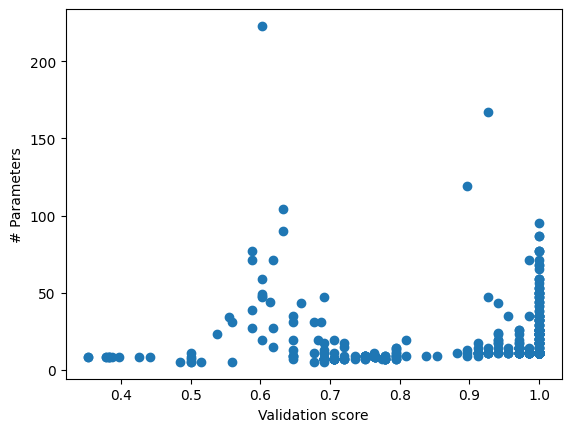

In [8]:
plt.scatter( search.info_all_trials['val_score'], search.info_all_trials['n_params'])
plt.xlabel("Validation score")
plt.ylabel("# Parameters")
plt.show()

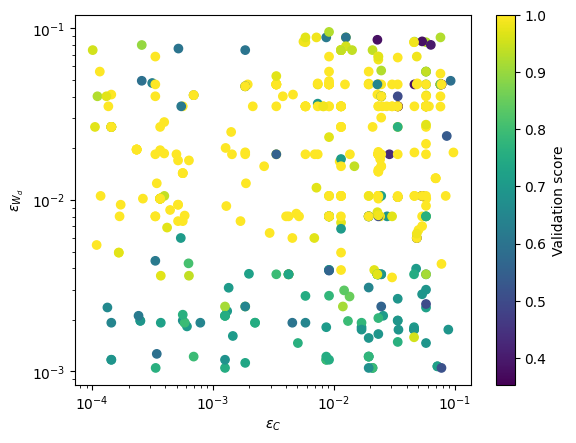

In [9]:
plt.scatter( search.info_all_trials['epsC'], search.info_all_trials['epsD'], c=search.info_all_trials['val_score'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r"$\varepsilon_{C}$")
plt.ylabel(r"$\varepsilon_{W_d}$")
plt.colorbar(label='Validation score')
plt.show()

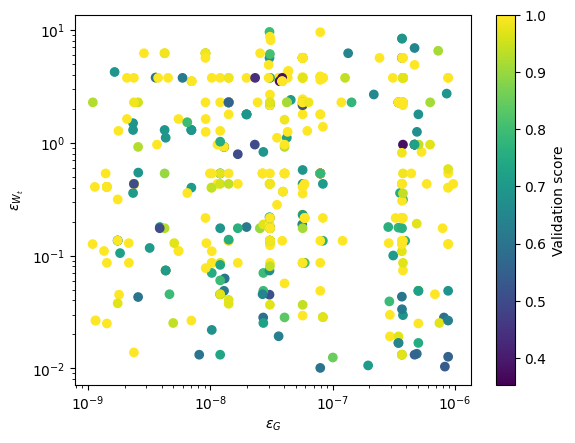

In [10]:
plt.scatter( search.info_all_trials['epsG'], search.info_all_trials['epsT'], c=search.info_all_trials['val_score'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r"$\varepsilon_{G}$")
plt.ylabel(r"$\varepsilon_{W_t}$")
plt.colorbar(label='Validation score')
plt.show()

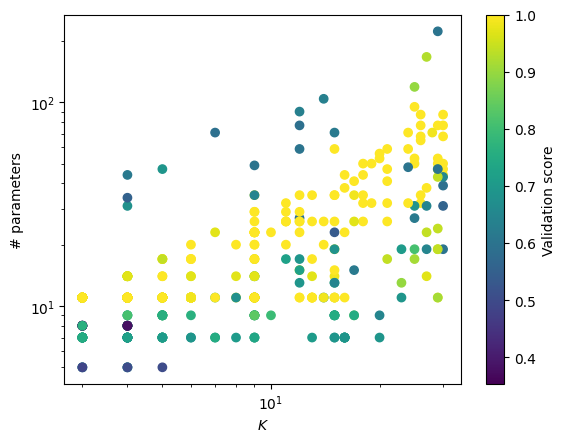

In [11]:
plt.scatter( search.info_all_trials['K'], search.info_all_trials['n_params'], c=search.info_all_trials['val_score'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r"$K$")
plt.ylabel("# parameters")
plt.colorbar(label='Validation score')
plt.show()